### Template Matching

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
full_img = cv2.imread('./Images/squirrel.jpg')
full_img=cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)


face_img=cv2.imread('./Images/squirrel_face.jpg')
face_img=cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)


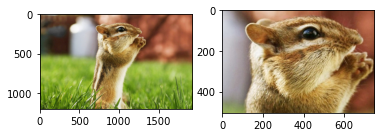

In [10]:
plt.subplot(1,2,1)
plt.imshow(full_img)
plt.subplot(1,2,2)
plt.imshow(face_img)

In [11]:
height, width , channels = face_img.shape

In [12]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

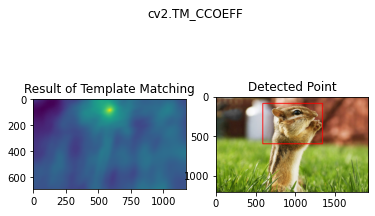

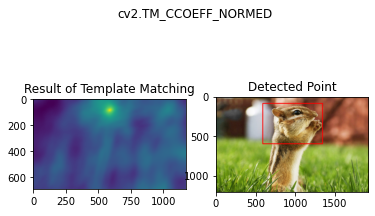

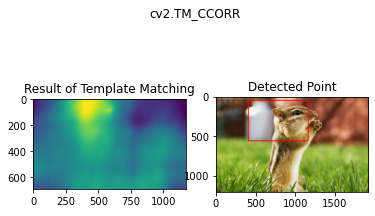

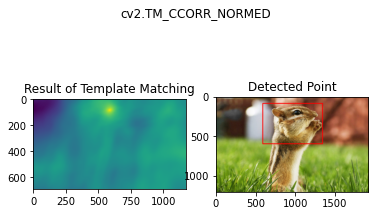

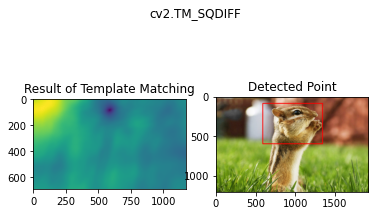

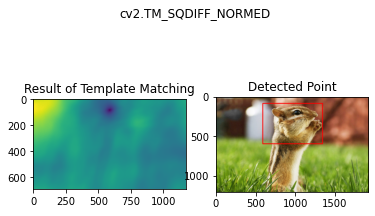

In [13]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full_img.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face_img,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    

### EDGE DETECTION

#### Canny Edge Detection

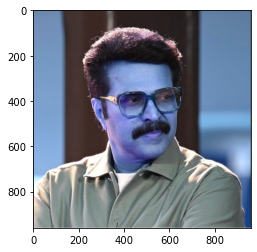

In [16]:
edge_img=cv2.imread('./Images/mamooty.jpg')
plt.imshow(edge_img)

In [24]:
edegs=cv2.Canny(edge_img, threshold1=100, threshold2= 255)

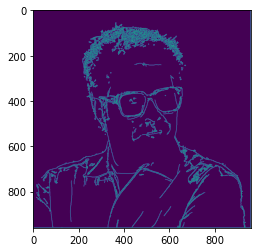

In [25]:
plt.imshow(edegs)

In [26]:
#Choosing Optimised threshold values for better result

In [28]:
# Calculate the median pixel value
med_val = np.median(edge_img)
med_val

119.0

In [29]:
#Lower bound is either 0 or 70% of the median value, whicever is higher
lower = int(max(0, 0.7* med_val))
lower

83

In [31]:
#Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))
upper

154

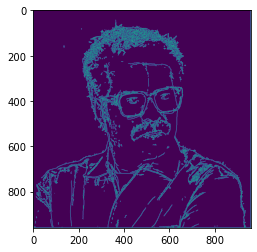

In [32]:
#Apply lower and upper threshold
edges = cv2.Canny(edge_img, threshold1 = lower, threshold2 = upper)
plt.imshow(edges)